# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2021.10.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumSquare') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.font_manager._rebuild()

Matplotlib is building the font cache; this may take a moment.


In [3]:
# 데이터 불러오기
train=pd.read_csv("content/movies_train.csv")
#test=pd.read_csv("content/movies_test.csv")
#submission=pd.read_csv("content/submission.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [6]:
print(train.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [8]:
pd.options.display.float_format = '{:.1f}'.format

In [9]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [10]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [11]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778


In [12]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [13]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [14]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

# 5-1) 평균 관객 수가 많은 배급사 top 10

In [16]:
data = train[["distributor", "box_off_num"]].groupby(["distributor"]).mean()
data.sort_values(by = ['box_off_num'],ascending = False)[:10]

,box_off_num
distributor,
CJ E&M Pictures,4122337.0
(주)쇼박스,3386656.3
(주)아이필름코퍼레이션,3117859.0
쇼박스(주)미디어플렉스,2634823.0
영구아트무비,2541603.0
CJ E&M 영화부문,2505309.3
(주)NEW,2184404.8
CJ 엔터테인먼트,2162742.5
이십세기폭스코리아(주),1637046.0


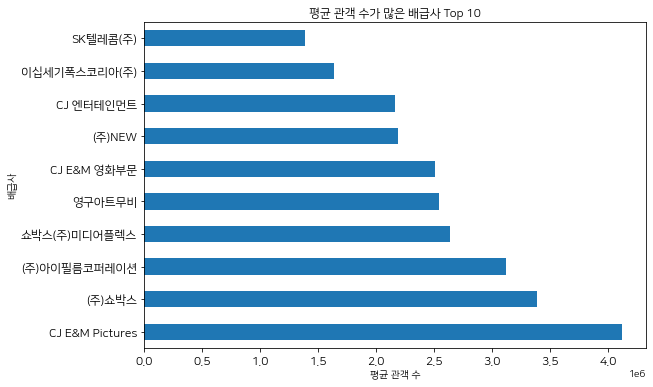

In [17]:
ax = data.sort_values(by = ['box_off_num'],ascending = False)[:10].plot(kind="barh", figsize=(9,6), fontsize=12)
ax.set_title("평균 관객 수가 많은 배급사 Top 10")
ax.set_xlabel("평균 관객 수")
ax.set_ylabel("배급사")
ax.get_legend().remove()

# 5-2) 개봉 년도 별 최다 관객  영화

In [18]:
train["release_year"]=train["release_time"].dt.year

In [19]:
# 최댓값인덱스 idxmax
a=train.loc[train.groupby("release_year")["box_off_num"].idxmax()][["release_year","title","box_off_num"]]
a.set_index("release_year")

,title,box_off_num
release_year,,
2010,아저씨,6178665
2011,최종병기 활,7482180
2012,도둑들,12983841
2013,7번방의 선물,12811435
2014,국제시장,14262766
2015,암살,12706663


# 5-3) 개봉 분기 별/ 월 별 영화 장르 top 3

In [20]:
train["release_month"]=train["release_time"].dt.month
train["release_quarter"]=train["release_time"].dt.quarter

In [21]:
a=train.groupby("release_month")["genre"].apply(lambda x : x.value_counts()[:3])
pd.DataFrame(a)

genre
release_month              
1             드라마        16
              코미디         8
              다큐멘터리       6
2             드라마        12
              멜로/로맨스      4
              느와르         4
3             드라마        18
              멜로/로맨스     11
              다큐멘터리       6
4             드라마        18
              다큐멘터리      12
              멜로/로맨스      9
5             드라마        25
              다큐멘터리       9
              코미디         9
6             드라마        11
              다큐멘터리       5
              공포          4
7             드라마        15
              다큐멘터리       7
              공포          6
8             드라마        10
              공포         10
              다큐멘터리       7
9             드라마        27
              다큐멘터리      10
              멜로/로맨스      6
10            드라마        21
              멜로/로맨스     12
              다큐멘터리       7
11            드라마        26
              멜로/로맨스     11
              다큐멘터리      10
12            드라마        22
              다큐멘터리      10
              멜로/로맨스      5

In [33]:
a=train.groupby("release_quarter")["genre"].apply(lambda x : x.value_counts()[:3])
a=pd.DataFrame(a)
a

genre
release_quarter              
1               드라마        46
                멜로/로맨스     19
                다큐멘터리      16
2               드라마        54
                다큐멘터리      26
                멜로/로맨스     16
3               드라마        52
                다큐멘터리      24
                공포         20
4               드라마        69
                멜로/로맨스     28
                다큐멘터리      27

In [34]:
a=a.reset_index()

Text(0.5, 1.0, '개봉 분기 별 영화 장르 Top 3')

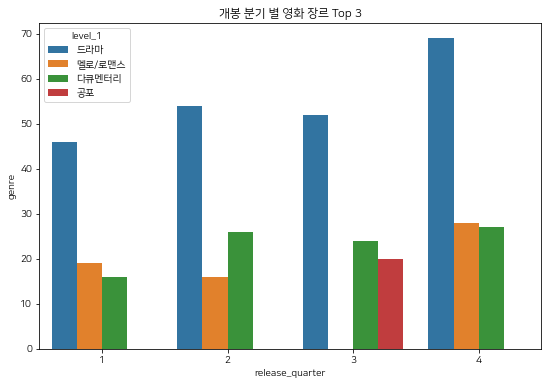

In [135]:
f, ax = plt.subplots(figsize=(9, 6))
ax=sns.barplot(x="release_quarter", y="genre",hue="level_1",data=a)
ax.set_title("개봉 분기 별 영화 장르 Top 3")

- 드라마는 매분기 top 1에 해당했다.
- 드라마, 멜로/로맨스, 다큐멘터리, 코미디가 상위 영화장르에 속했다.
- 7월, 8월(3분기) 여름에 공포 영화가 많이 개봉했다.

# 5-4) 상영 등급 별 관객 분포

In [72]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.5)

def q3(x):
    return x.quantile(0.75)

print(train["screening_rat"].value_counts())
print(train.groupby(["screening_rat"])["box_off_num"].agg([q1, q2, q3, "mean"],ascending=False))

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64
                  q1       q2        q3      mean
screening_rat                                    
12세 관람가       1943.5  19323.0  808472.8  844980.9
15세 관람가       3048.0 242381.0 1213018.5 1247518.6
전체 관람가        1210.0   8325.0   35647.8  135100.5
청소년 관람불가       812.0   3008.5   95404.2  364181.3


Text(0.5, 1.0, '상영 등급 별 관객 분포')

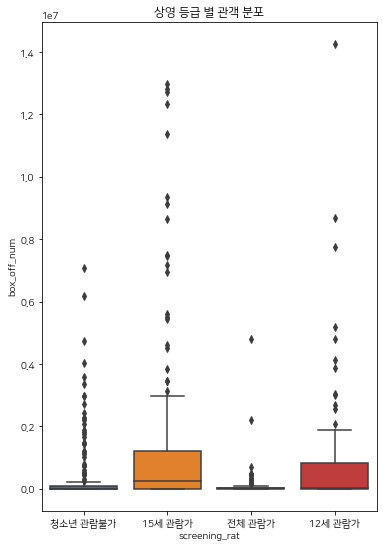

In [88]:
f, ax = plt.subplots(figsize=(6,9))
ax=sns.boxplot(x="screening_rat", y="box_off_num", data=train)
ax.set_title("상영 등급 별 관객 분포")

- 15세 관람가> 12세 관람가> 청소년 관람불가> 전체 관람가 순으로 관객 수가 분포한다.
- 청소년 관람가와 전체관람가는 25% ~ 75% 구간에 관객 수가 몰려 있다.   

# 5-5) 스텝 수와 관객 수의 관계

Text(0.5, 1.0, '스텝 수와 관객 수의 관계')

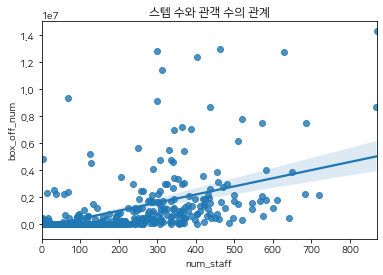

In [94]:
ax=sns.regplot(x="num_staff", y="box_off_num", data=train)
ax.set_title("스텝 수와 관객 수의 관계")

In [123]:
# 상관계수
np.corrcoef(train["num_staff"],train["box_off_num"])[0,1]

0.5442647163889159

- 스텝 수와 관객 수는 다소 높은 양의 상관관계를 갖는다.

# 5-6) 변수들의 상관계수 행렬

<AxesSubplot:>

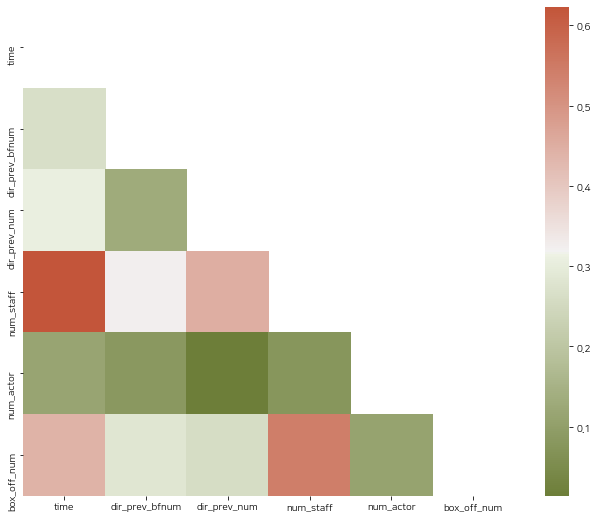

In [136]:
train=pd.read_csv("content/movies_train.csv")
corr = train.corr()

# 상삼각행렬(upper triangular matrix)을 반환
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# 컬러
cmap = sns.diverging_palette(100, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

-  스텝 수와 상영시간 / 스텝 수와 관객 수 / 스텝 수와 감독의 이전 영화 개수 / 관객수와 상영시간은 높은 양의 상관을 갖는다.